In [2]:
%matplotlib inline

In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from networkx import *


In [4]:

#G=nx.Graph()
n=20


def criar(n):
    G=nx.Graph()
    for i in range(n**2-2):
        G.add_node(i)
    return G

    

In [5]:
G=criar(4)

In [8]:
p=1/n
x=-1.00
y=1.00
pos={}
pos[0]=[x,y]
for i in range(1,n*n):
  #  pos[i]=[x,y]
    x=x+p
    if i % n == 0:
        x=-1.00
        y=y-p
        
    pos[i]=[x,y]


In [9]:
def borda_esquerda(valor,n):
    if valor % n == 0:
        return True
    else:
        return False
    
def borda_direita(valor,n):
    if valor % n== n-1:
        return True 
    else:
        return False

def borda_superior(valor,n):
    if valor - n <0:
        return True
    else:
        return False

def borda_inferior(valor,n):
    if valor + n > n**2-1:
        return True
    else:
        return False

    
    





In [8]:



for i in range(0,n**2-1):
    if borda_superior(i,n):
        if borda_direita(i,n):
            G.add_edge(i,i+(n**2-n)) #cima
            G.add_edge(i,i-1)         #esquerda
            G.add_edge(i,i-(n-1))#direita
            G.add_edge(i,i+n)#baixo

        elif borda_esquerda(i,n): 
            G.add_edge(i,i+(n**2-n))#cima
            G.add_edge(i,i+(n-1))  #esquerda
            G.add_edge(i,i+1)  #direita
            G.add_edge(i,i+n) #baixo
        else:
            G.add_edge(i,i+(n**2-n))
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i+n)

    elif borda_inferior(i,n):
        if borda_direita(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i-(n-1))
            G.add_edge(i,i-1)
            G.add_edge(i,i-(n**2-n))
        elif borda_esquerda(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i+(n-1))
            G.add_edge(i,i+1)
            G.add_edge(i,i-(n**2-n)) 
        else:
            G.add_edge(i,i-n)
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i-(n**2-n)) 

    else:
        if borda_direita(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i-(n-1))
            G.add_edge(i,i-1)
            G.add_edge(i,i+n)
        elif borda_esquerda(i,n):
            G.add_edge(i,i-n) #cima
            G.add_edge(i,i+(n-1)) #esquerda
            G.add_edge(i,i+1)#direita
            G.add_edge(i,i+n) #baixo
        else:
            G.add_edge(i,i-n)
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i+n)
        
        

In [10]:

estados=np.zeros(len(G),dtype=np.int)


v_map={}
for i in range(len(G)):
    v_map[i]=0
    


cmap=[]


for i in range(0,len(G)):
    cmap.append('r')
    
    
def muda_cor(mapa_cores,indice,cor_desejada):
    mapa_cores[indice]=cor_desejada
    return mapa_cores
    










In [13]:
nodos=list(G.nodes)

In [19]:

for i in range(len(v_map)):
    v_map[i]=estados[i]


In [20]:
def atualiza_cor(valores,cores):

    for i in range(len(valores)):
        if valores[i] == 0:
            muda_cor(cmap,i,'r')
        else:
            muda_cor(cmap,i,'b')
            
    return cores       

/home/andrenogueira/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


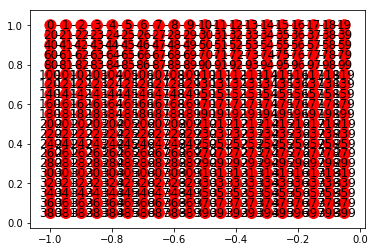

In [21]:

draw_networkx(G,node_size=125,pos=pos,periodic=True,node_color=cmap,values=v_map) #values=v_map #v_map={}

In [23]:
def paridade(Graph,nodoPosition,state):

    L=np.array(Graph[nodoPosition])
    soma=state[L[0]]+state[L[1]]+state[L[2]]+state[L[3]]
    if soma % 2 == 0:
        return 0
    else:
        return 1

In [24]:
def rule(Graph,nodoPosition,state):
    L=np.array(Graph[nodoPosition])
    soma=state[L[0]]+state[L[1]]+state[L[2]]+state[L[3]]
    #print(L[1])
    if (soma==0 ):
        return 0
    else:
        return 1

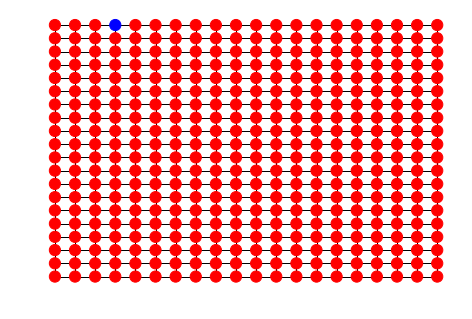

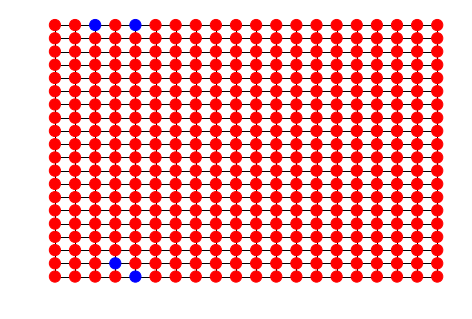

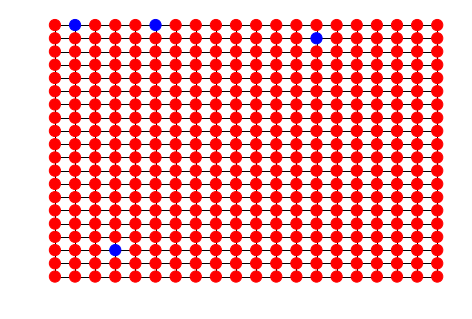

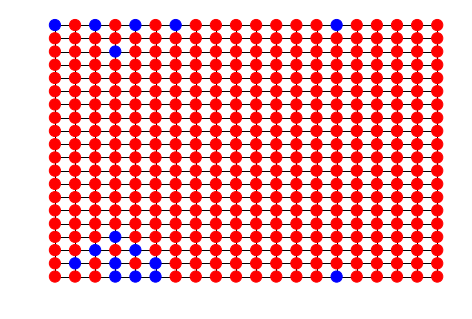

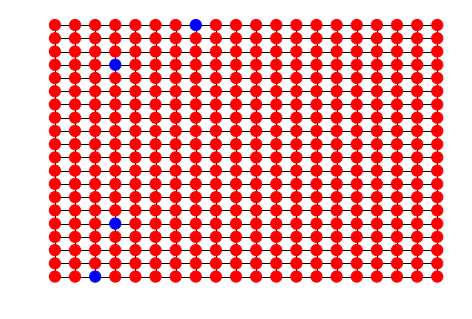

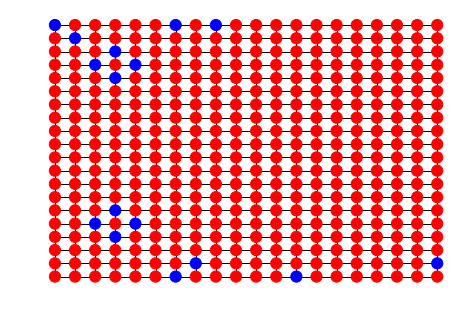

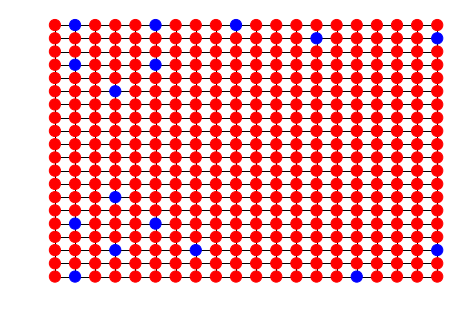

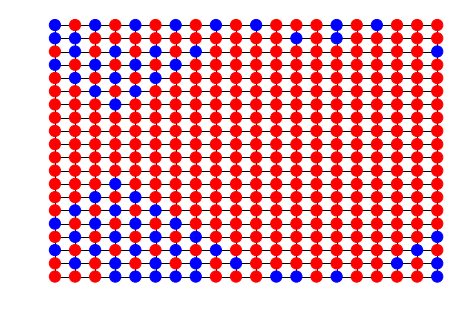

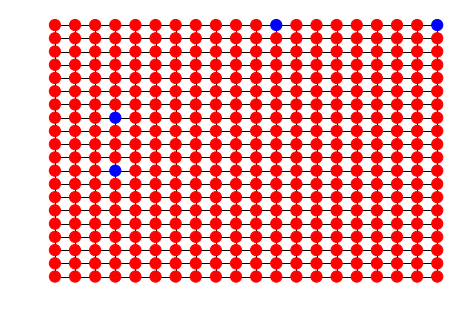

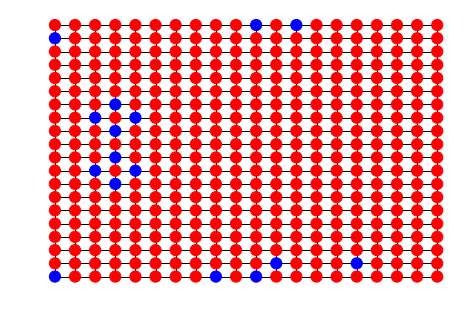

In [28]:

#estado_inicial[6]=1
#estados1=estado_inicial[:]
temp=np.zeros(len(G),dtype=np.int)
temp[0]=0
temp[1]=0
temp[2]=0
temp[3]=1
temp[4]=0
temp[5]=0
temp[6]=0
temp[7]=0
temp[8]=0
temp[9]=0
temp[10]=0
temp[11]=0
temp[12]=0
temp[13]=0
temp[14]=0
temp[15]=0

est=[]

variavelParaTeste= np.zeros(len(G),dtype=np.int)
variavelParaTeste[2]=1
variavelParaTeste[5]=1
variavelParaTeste[7]=1
variavelParaTeste[10]=1

for k in range(len(v_map)):
        v_map[k]=temp[k]
        
        
t=10
for i in range(t):
    
    est=np.zeros(len(G),dtype=np.int)
    cmap=atualiza_cor(v_map,cmap) 
       
        
    plt.figure(i)   
    draw(G,node_size=125,pos=pos,periodic=True,node_color=cmap,values=v_map) #Consertar!!
    plt.show()

    
    
    for j in range(len(temp)):
        v=paridade(G,j,temp)
        est[j]=v
        
    
    temp=est[:]   
    v_map=temp[:]
 
    cmap=atualiza_cor(v_map,cmap)  
  
    

In [11]:
neighbors(G,0)

In [12]:
myit=iter(G.nodes)
type(myit)

lista=list(G.nodes)
type(G.nodes)
type(lista)
print(lista)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
